# PROYECTO FINAL INGENIERIA DE SOFTWARE 3

Integrantes: 

    - Sergio Nelson Alberto G√≥mez Gil-2214106
    - Juan Pablo Avila Quitian-2214107
    - Juan David Saavedra G√≥nzalez-2214111
    

# 1. Introducci√≥n

Este proyecto final se centra en el an√°lisis emp√≠rico del comportamiento de una aplicaci√≥n bajo distintos escenarios de despliegue, utilizando **Docker Compose** y **Kubernetes**. 

Nosotros como estudiantes desplegaremos una aplicaci√≥n en configuraciones que var√≠an desde un √∫nico contenedor hasta cl√∫steres de Kubernetes con diferentes niveles de escalabilidad (n√∫mero de r√©plicas y nodos). 

El objetivo principal es observar y cuantificar m√©tricas de rendimiento clave, como el **tiempo medio de respuesta** y el **throughput**, bajo diferentes cargas, para luego analizar c√≥mo el entorno de despliegue impacta en la aplicaci√≥n y extraer conclusiones sobre su **escalabilidad** y **eficiencia**.

---

# 2. Objetivo General

Analizar el comportamiento de una aplicaci√≥n bajo diferentes escenarios de despliegue utilizando herramientas de contenedores como **Docker Compose** y de orquestaci√≥n como **Kubernetes**, observando m√©tricas de rendimiento y escalabilidad para comprender las implicaciones de cada configuraci√≥n, especialmente en lo referente al **escalado horizontal**.

---

# 3. Objetivos Espec√≠ficos


- Desplegar una aplicaci√≥n utilizando **Docker Compose** en un entorno de una √∫nica m√°quina.
- Desplegar la misma aplicaci√≥n en un cl√∫ster de **Kubernetes** usando uno, dos y tres nodos, variando el n√∫mero de r√©plicas de los servicios de la aplicaci√≥n.
- Utilizar la herramienta **JMeter** para generar carga en la aplicaci√≥n en cada escenario de despliegue y observar m√©tricas clave como **tiempo medio de respuesta** y **throughput** (tasa de peticiones).
- Observar y registrar el comportamiento de las m√©tricas bajo diferentes cargas y n√∫mero de r√©plicas en cada escenario.
- Analizar las diferencias en el comportamiento de la aplicaci√≥n entre los distintos escenarios de despliegue y las variaciones en el n√∫mero de r√©plicas.
- Extraer conclusiones basadas en los datos observados sobre la **escalabilidad**, la **eficiencia de recursos** y las posibles **limitaciones** de cada escenario y configuraci√≥n de r√©plicas.


# 3. Descripci√≥n Proyecto

Este proyecto de ingenier√≠a de software tiene como objetivo desarrollar una plataforma
web eficiente y accesible para la compra de boletas, buscando obtener una experiencia
de usuario y una gesti√≥n de eventos optimizada. La plataforma permitir√° a los usuarios
buscar eventos, seleccionar localidades, controlar la cantidad de ventas y vista de
informes.
A nivel t√©cnico, el desarrollo se basar√° en tecnolog√≠as modernas de desarrollo web para
la facilidad de su uso e implementaci√≥n. El sistema est√° dise√±ado para ofrecer una
experiencia de usuario fluida, cubriendo tanto las necesidades de los administradores
como las de los usuarios finales.

---

# 4. Metodolog√≠a del JMETER

La configuraci√≥n que se va a usar para poner a prueba el funcionamiento del despliegue seran las siguientes:

    - Threads: 2000
    - Ramp-up: 60
    - Loop Count: Forever
    - Duration: 10 minutos
    - Timer entre peticiones: 2s (Constant Timer)

Esta configuraci√≥n de JMeter es ideal para realizar pruebas de carga intensiva o stress test, ya que simula 2000 usuarios concurrentes accediendo al sistema durante 10 minutos. El ramp-up de 60 segundos distribuye progresivamente la creaci√≥n de los hilos (usuarios), evitando una sobrecarga repentina y permitiendo observar c√≥mo responde el sistema ante un aumento gradual de tr√°fico. Al usar un loop infinito con duraci√≥n definida, se garantiza que todos los hilos generen solicitudes de manera continua durante todo el per√≠odo de prueba, lo cual es √∫til para medir estabilidad y rendimiento sostenido.

Adem√°s, establecer un Startup Delay de 2 segundos y controlar la vida √∫til de los hilos ayuda a sincronizar correctamente el inicio del test con herramientas de monitoreo, y asegura que todos los hilos trabajen durante el mismo intervalo. Esta combinaci√≥n permite obtener m√©tricas clave como tiempo de respuesta, throughput y tasa de errores bajo condiciones cercanas a un escenario de producci√≥n o incluso de sobrecarga, revelando cuellos de botella o l√≠mites de capacidad en el sistema evaluado.


---

# 5. Organizando los datos obtenidos en jmeter

### Instalando librerias necesarias

In [ ]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\gomez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### importando las librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Preparando los datos

In [ ]:
 #Cargar archivos fase 1
file_fase1 = "fase1.csv"

df1 = pd.read_csv(file_fase1)
# Agregar una columna para identificar el n√∫mero de r√©plicas
df1["replicas"] = 1
# Combinar los datos en un solo DataFrame
df1_all = df1.copy()
#-------------------------------------

# Cargar los archivos fase 2
file2_1 = "fase2_1replica.csv"
file2_2 = "fase2_2replica.csv"
file2_3 = "fase2_3replica.csv"

df2_1 = pd.read_csv(file2_1)
df2_2 = pd.read_csv(file2_2)
df2_3 = pd.read_csv(file2_3)

# Agregar una columna para identificar el n√∫mero de r√©plicas
df2_1["replicas"] = 1
df2_2["replicas"] = 2
df2_3["replicas"] = 3

# Combinar los datos en un solo DataFrame
df2_all = pd.concat([df2_1, df2_2, df2_3], ignore_index=True)

#-------------------------------------

# Cargar los archivos fase 3
file3_1 = "fase3_1replica.csv"
file3_2 = "fase3_2replica.csv"
file3_3 = "fase3_3replica.csv"

df3_1 = pd.read_csv(file3_1)
df3_2 = pd.read_csv(file3_2)
df3_3 = pd.read_csv(file3_3)
# Agregar una columna para identificar el n√∫mero de r√©plicas
df3_1["replicas"] = 1
df3_2["replicas"] = 2
df3_3["replicas"] = 3
# Combinar los datos en un solo DataFrame
df3_all = pd.concat([df3_1, df3_2, df3_3], ignore_index=True)
#-------------------------------------



In [ ]:
# Limpiar y convertir valores
df1_all['Error %'] = df1_all['Error %'].str.replace('%', '').astype(float)
df1_all['Throughput'] = pd.to_numeric(df1_all['Throughput'], errors='coerce')
# Filtrar solo las filas resumen de cada archivo
df_total1 = df1_all[df1_all["Label"] == "TOTAL"].copy()
df_total1 = df_total1.sort_values(by="replicas")

df2_all['Error %'] = df2_all['Error %'].str.replace('%', '').astype(float)
df2_all['Throughput'] = pd.to_numeric(df2_all['Throughput'], errors='coerce')

# Filtrar solo las filas resumen de cada archivo
df_total2 = df2_all[df2_all["Label"] == "TOTAL"].copy()
df_total2 = df_total2.sort_values(by="replicas")

# Limpiar y convertir valores
df3_all['Error %'] = df3_all['Error %'].str.replace('%', '').astype(float)
df3_all['Throughput'] = pd.to_numeric(df3_all['Throughput'], errors='coerce')

# Filtrar solo las filas resumen de cada archivo
df_total3 = df3_all[df3_all["Label"] == "TOTAL"].copy()
df_total3 = df_total3.sort_values(by="replicas")

## 5.1 Graficas de la fase 1

### 5.1.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1253549815.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total1, palette='Blues')


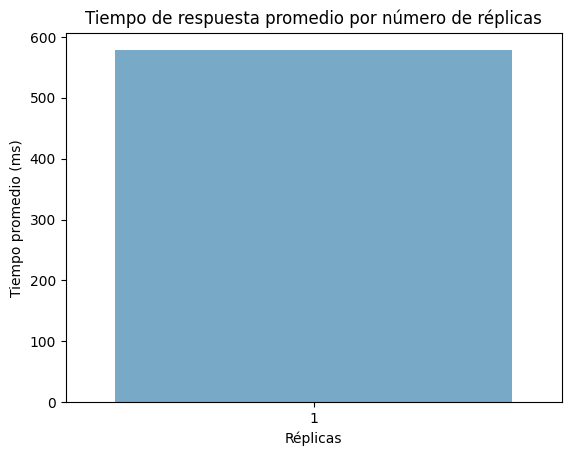

In [ ]:
sns.barplot(x='replicas', y='Average', data=df_total1, palette='Blues')
plt.title('Tiempo de respuesta promedio por n√∫mero de r√©plicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('R√©plicas')
plt.show()

### 5.1.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1205091382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total1, palette='Greens')


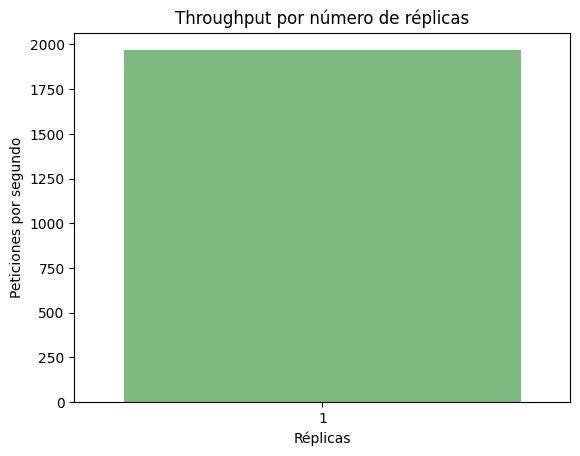

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total1, palette='Greens')
plt.title('Throughput por n√∫mero de r√©plicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('R√©plicas')
plt.show()

## 5.2 Graficas de la fase 2

### 5.2.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\3063712576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')


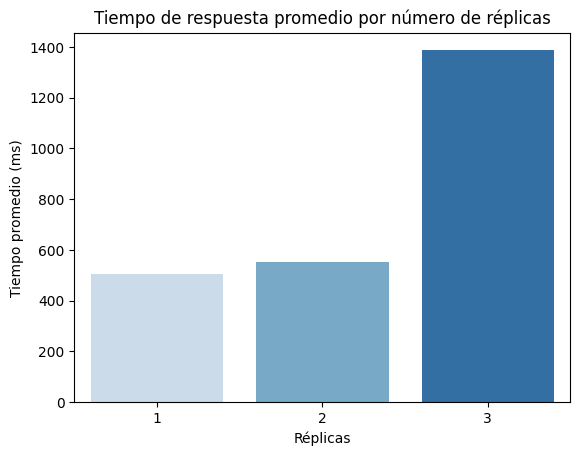

In [ ]:

sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')
plt.title('Tiempo de respuesta promedio por n√∫mero de r√©plicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('R√©plicas')
plt.show()

### 5.2.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1401419690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')


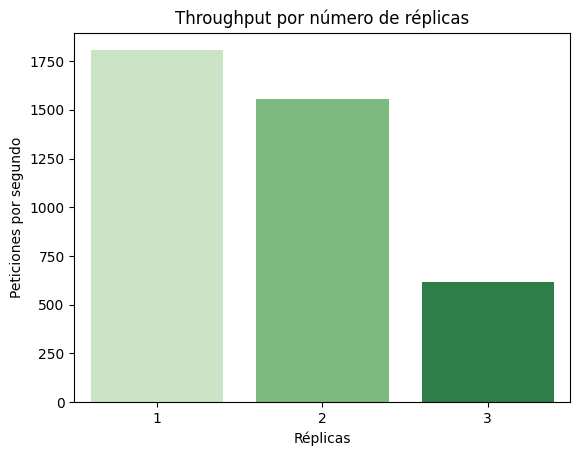

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')
plt.title('Throughput por n√∫mero de r√©plicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('R√©plicas')
plt.show()

## 5.3 Graficas de la fase 3



### 5.3.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\2534850917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')


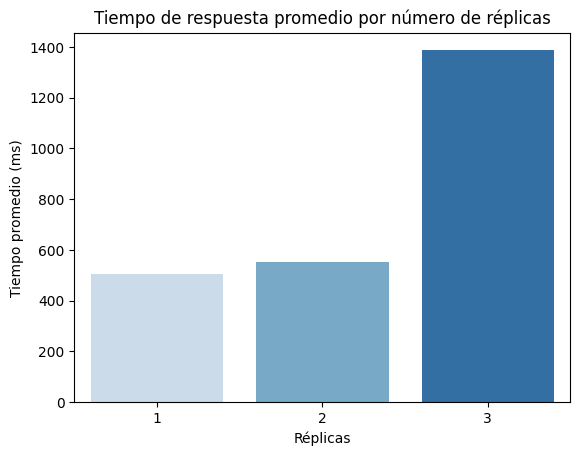

In [ ]:

sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')
plt.title('Tiempo de respuesta promedio por n√∫mero de r√©plicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('R√©plicas')
plt.show()



### 5.3.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\3684250586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')


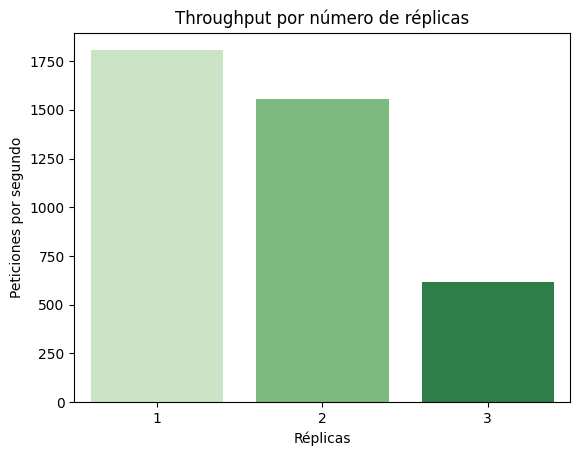

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')
plt.title('Throughput por n√∫mero de r√©plicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('R√©plicas')
plt.show()



## üîç An√°lisis Consolidado

### Rendimiento por Fase y R√©plica

| Fase  | R√©plicas | Avg (ms) | Std. Dev. | Error % | Throughput (req/s) | Avg. Bytes |
|-------|----------|----------|-----------|---------|---------------------|-------------|
| 1     | -        | 578      | 1448.68   | 82.31%  | 1967.42             | 2806.1      |
| 2     | 1        | 571      | 1029.14   | 80.47%  | 2470.71             | 2829.6      |
| 2     | 2        | 765      | 2654.64   | 73.77%  | 2217.11             | 2940.7      |
| 2     | 3        | 923      | 2082.09   | 68.23%  | 1769.41             | 3054.8      |
| 3     | 1        | 504      | 2621.94   | 89.16%  | 1805.46             | 2669.7      |
| 3     | 2        | 551      | 2250.96   | 78.72%  | 1556.22             | 2846.5      |
| 3     | 3        | 1387     | 3650.16   | 55.10%  | 617.09              | 3286.1      |

### Observaciones Clave

- El throughput m√°s alto se alcanz√≥ con 1 r√©plica en la fase 2, indicando que m√°s r√©plicas no siempre resultan en mejor rendimiento.
- El porcentaje de errores es elevado en todas las fases, especialmente en la fase 3 con 1 r√©plica (89.16%) y fase 1 (82.31%).
- El tiempo promedio (Average) aumenta notablemente a medida que se agregan r√©plicas en fase 3, con una latencia cr√≠tica de 1387 ms en 3 r√©plicas.
- El `Avg. Bytes` muestra un crecimiento con el n√∫mero de r√©plicas, lo cual puede deberse a cargas mayores o a mayores vol√∫menes de datos procesados.

---



## ‚úÖ Conclusiones

1. **No hay escalabilidad lineal con r√©plicas:** En lugar de mejorar, el rendimiento decrece en la mayor√≠a de los casos al aumentar el n√∫mero de r√©plicas, especialmente evidente en la fase 3.
2. **Elevado porcentaje de errores:** Todas las pruebas reportan tasas de error por encima del 50%, lo que compromete seriamente la confiabilidad del sistema bajo carga.
3. **La fase 2 es la m√°s equilibrada:** Con una sola r√©plica, ofrece el mejor compromiso entre rendimiento (throughput) y tiempo de respuesta, aunque el error sigue siendo alto.
4. **Fase 3 no tolera bien la carga:** Incluso con pocas r√©plicas, su latencia y error son cr√≠ticos.

---



## üìå Recomendaciones

### Para el sistema:

- **Mejorar manejo de concurrencia:** El alto porcentaje de errores y la falta de escalabilidad sugieren cuellos de botella o mal dise√±o en el manejo de m√∫ltiples peticiones simult√°neas.
- **Implementar control de calidad y validaci√≥n de respuestas:** Los errores podr√≠an estar relacionados con respuestas inesperadas o ca√≠das silenciosas del servidor. Registrar y depurar esto es prioritario.
- **Ajustar configuraci√≥n de red y servidores:** Validar l√≠mites de recursos, como hilos m√°ximos, conexiones simult√°neas, y memoria disponible por r√©plica.

### Para futuras pruebas:

- **Aumentar gradualidad en la carga:** Usar ramp-up controlado en JMeter y probar con diferentes perfiles de usuarios concurrentes.
- **Incluir m√©tricas de sistema:** CPU, RAM, uso de disco y red para correlacionar fallas de aplicaci√≥n con carga en infraestructura.
- **Incluir pruebas de estr√©s y endurance:** Para evaluar estabilidad a largo plazo bajo condiciones sostenidas.